Cars contain 50 or more sensors which collect data on speed, emissions, fuel consumption, usage data for resources, and security. All these data can be used to find patterns and resolve quality issues either in the nick of time or prevent them from happening altogether. Analytics is being used to increase both customer satisfaction and quality management at a cost-effective level. In this session we are doing some basic analysis of automobile data which the learners can further expand on.


#### Data Set 1 Information:

This data set consists of three types of entities:

(a) the specification of an auto in terms of various characteristics

(b) its assigned insurance risk rating

(c) its normalized losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.


No of instances : 205

No of attributes : (26)

#### Data set 2 information:

The data consists of technical specifications of cars. The dataset is downloaded from UCI Machine Learning Repository

Content:
The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

Number of Instances: 398

Number of Attributes: 9 including the class attribute

#### Attribute Information:
 * mpg: continuous
  * cylinders: multi-valued discrete
   * displacement: continuous
   * horsepower: continuous
   * weight: continuous
   * acceleration: continuous
   * model year: multi-valued discrete
   * origin: multi-valued discrete
   * car name: string (unique for each instance)

Missing Attribute Values: horsepower has 6 missing values





In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv("C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\Data Exploration of Automobile Data\\data\\data_1.csv")
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


In [25]:
df.shape

(205, 14)

In [26]:
df.shape[0]

205

In [27]:
df.shape[1]

14

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   make          205 non-null    object 
 2   fuel-type     205 non-null    object 
 3   body-style    205 non-null    object 
 4   drive-wheels  205 non-null    object 
 5   wheel-base    205 non-null    float64
 6   length        205 non-null    float64
 7   width         205 non-null    float64
 8   height        205 non-null    float64
 9   horsepower    205 non-null    int64  
 10  peak-rpm      205 non-null    int64  
 11  highway-mpg   205 non-null    int64  
 12  city-mpg      205 non-null    int64  
 13  price         205 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


In [29]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'body-style', 'drive-wheels',
       'wheel-base', 'length', 'width', 'height', 'horsepower', 'peak-rpm',
       'highway-mpg', 'city-mpg', 'price'],
      dtype='object')

In [30]:
for i in df.columns:
    print(i,': ', df[i].unique(), '\n' '\n')

symboling :  [ 3  1  2  0 -1 -2] 


make :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] 


fuel-type :  ['gas' 'diesel'] 


body-style :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 


drive-wheels :  ['rwd' 'fwd' '4wd'] 


wheel-base :  [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1] 


length :  [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 17

In [31]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i,': ', df[i].unique(), '\n' '\n')
    else:
        print (i, ':', df[i].dtypes)

symboling : int64
make :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] 


fuel-type :  ['gas' 'diesel'] 


body-style :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 


drive-wheels :  ['rwd' 'fwd' '4wd'] 


wheel-base : float64
length : float64
width : float64
height : float64
horsepower : int64
peak-rpm : int64
highway-mpg : int64
city-mpg : int64
price : int64


In [32]:
df.dtypes

symboling         int64
make             object
fuel-type        object
body-style       object
drive-wheels     object
wheel-base      float64
length          float64
width           float64
height          float64
horsepower        int64
peak-rpm          int64
highway-mpg       int64
city-mpg          int64
price             int64
dtype: object

In [33]:
def data_overview(dat):
    print ("Categorial Categories:")
    for col in dat.columns:
        if df[col].dtype=="object":
            print (col, " -> ", df[col].unique(), "\n")
        print("\n Numeric Features \n", dat.describe())
        
        
data_overview(df)

Categorial Categories:

 Numeric Features 
         symboling  wheel-base      length       width      height  horsepower  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878  104.936585   
std      1.245307    6.021776   12.337289    2.145204    2.443522   40.609702   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   48.000000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   70.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   95.000000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000  116.000000   
max      3.000000  120.900000  208.100000   72.300000   59.800000  288.000000   

          peak-rpm  highway-mpg    city-mpg         price  
count   205.000000   205.000000  205.000000    205.000000  
mean   5127.804878    30.751220   25.219512  13476.258537  
std     478.414007     6.886443    6.542142   


 Numeric Features 
         symboling  wheel-base      length       width      height  horsepower  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878  104.936585   
std      1.245307    6.021776   12.337289    2.145204    2.443522   40.609702   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   48.000000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   70.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   95.000000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000  116.000000   
max      3.000000  120.900000  208.100000   72.300000   59.800000  288.000000   

          peak-rpm  highway-mpg    city-mpg         price  
count   205.000000   205.000000  205.000000    205.000000  
mean   5127.804878    30.751220   25.219512  13476.258537  
std     478.414007     6.886443    6.542142   8114.166248  
min    41

In [34]:
def data_overview(dat):
    print("Categorial Categories")
    for col in dat.columns:
        if dat[col].dtype == 'object':
            print(col, " -> ", dat[col].unique(), '\n')
        print(dat.describe)
        
data_overview(df)

Categorial Categories
<bound method NDFrame.describe of      symboling         make fuel-type   body-style drive-wheels  wheel-base  \
0            3  alfa-romero       gas  convertible          rwd        88.6   
1            3  alfa-romero       gas  convertible          rwd        88.6   
2            1  alfa-romero       gas    hatchback          rwd        94.5   
3            2         audi       gas        sedan          fwd        99.8   
4            2         audi       gas        sedan          4wd        99.4   
..         ...          ...       ...          ...          ...         ...   
200         -1        volvo       gas        sedan          rwd       109.1   
201         -1        volvo       gas        sedan          rwd       109.1   
202         -1        volvo       gas        sedan          rwd       109.1   
203         -1        volvo    diesel        sedan          rwd       109.1   
204         -1        volvo       gas        sedan          rwd       109.1

Categorial Categories
make  ->  toyota           15.609756
nissan            8.780488
mazda             8.292683
mitsubishi        6.341463
honda             6.341463
subaru            5.853659
volkswagen        5.853659
peugot            5.365854
volvo             5.365854
dodge             4.390244
bmw               3.902439
mercedes-benz     3.902439
audi              3.414634
plymouth          3.414634
saab              2.926829
porsche           2.439024
isuzu             1.951220
jaguar            1.463415
chevrolet         1.463415
alfa-romero       1.463415
renault           0.975610
mercury           0.487805
Name: make, dtype: float64 

fuel-type  ->  gas       90.243902
diesel     9.756098
Name: fuel-type, dtype: float64 

body-style  ->  sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: body-style, dtype: float64 

drive-wheels  ->  fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drive

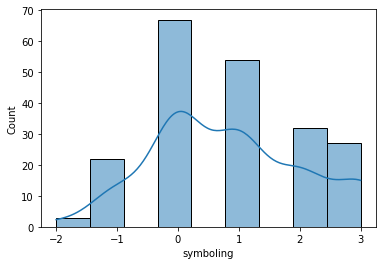

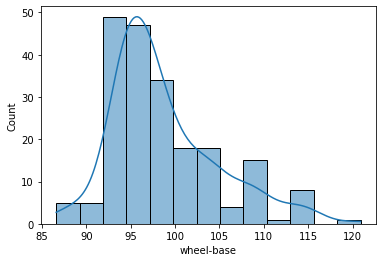

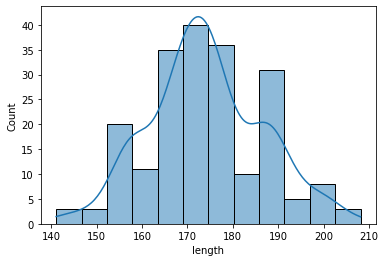

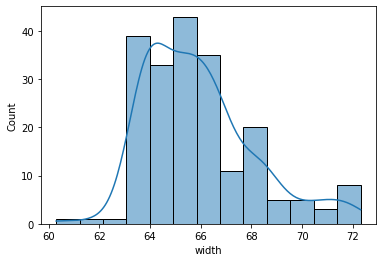

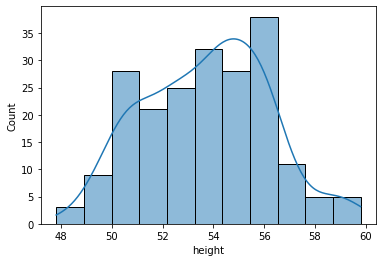

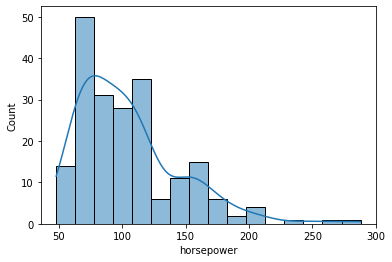

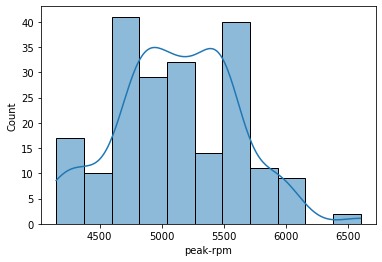

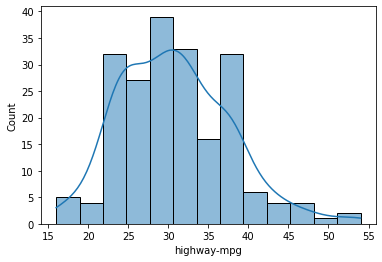

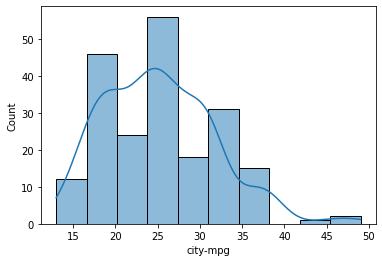

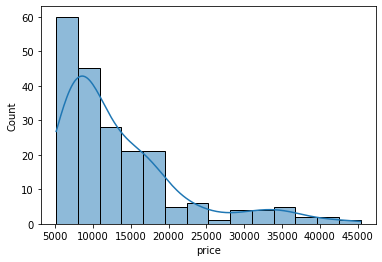

In [35]:
def data_overview(dat):
    print("Categorial Categories")
    for col in dat.columns:
        if dat[col].dtype == 'object':
            print(col, " -> ", dat[col].value_counts(normalize=True)*100, '\n') 
    
    for col in dat.columns:
        if dat[col].dtype != 'object':
            sns.histplot(dat[col],kde=True)
            plt.show()
        
data_overview(df)

<AxesSubplot:xlabel='price', ylabel='Count'>

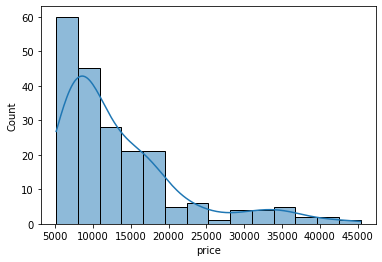

In [36]:

sns.histplot(df['price'], kde=True)

<AxesSubplot:xlabel='make', ylabel='Count'>

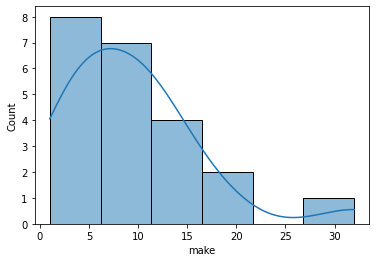

In [37]:
sns.histplot(df['make'].value_counts(), kde=True)

<AxesSubplot:xlabel='make', ylabel='count'>

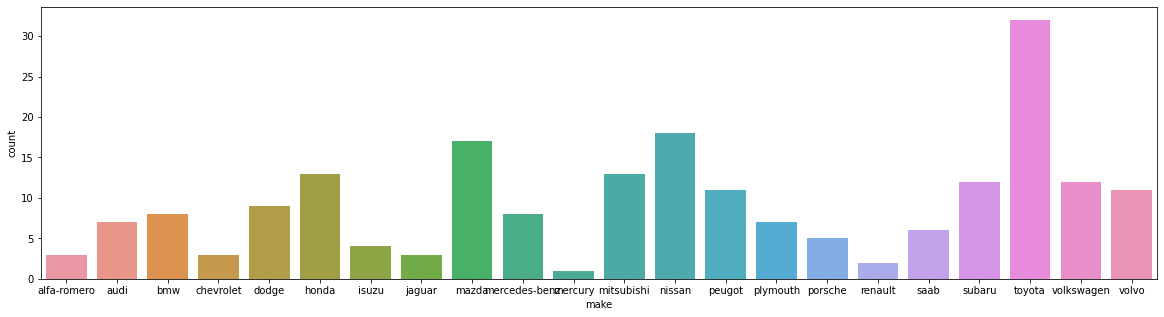

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(df['make'])

<AxesSubplot:xlabel='count', ylabel='make'>

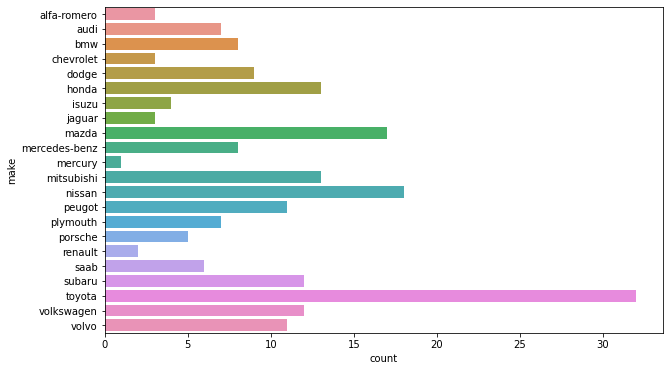

In [39]:
plt.figure(figsize=(10,6))
sns.set_color_codes('pastel')
sns.countplot(y='make', data=df)

In [40]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'body-style', 'drive-wheels',
       'wheel-base', 'length', 'width', 'height', 'horsepower', 'peak-rpm',
       'highway-mpg', 'city-mpg', 'price'],
      dtype='object')

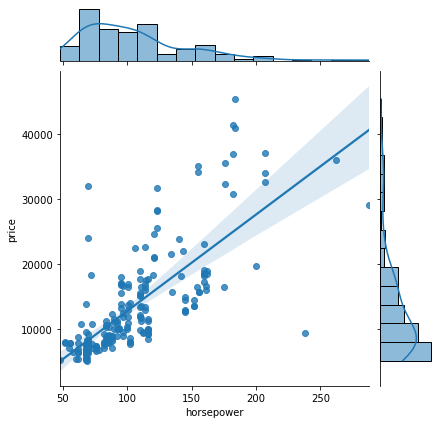

In [41]:
sns.jointplot('horsepower','price', data=df, kind='reg')

<AxesSubplot:>

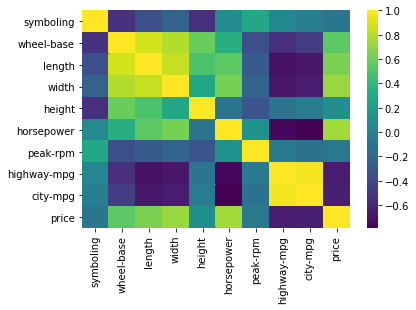

In [42]:
sns.heatmap(df.corr(), cmap='viridis')

<AxesSubplot:xlabel='body-style', ylabel='price'>

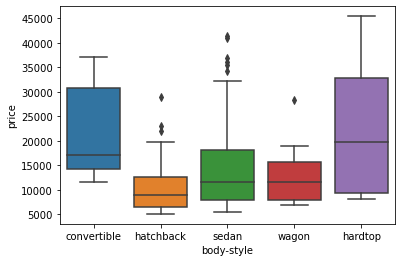

In [43]:
sns.boxplot(x = 'body-style', y = 'price', data=df)

### Data 2

###  Load the data  stored in `data_1` using `.read_csv()` api.

### Get an overview of your data by using info() and describe() functions of pandas.



In [77]:
df = pd.read_csv("C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\Data Exploration of Automobile Data\\data\\data_1.csv")
dp = pd.read_csv("C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\Data Exploration of Automobile Data\\data\\data_2.csv")

In [78]:
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


In [95]:
dp.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [96]:
dp.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [97]:
dp["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [98]:
dp.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [99]:
dp = dp.replace("?", np.nan)


In [100]:
dp.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [106]:
dp['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [107]:
dp['normalized-losses'].astype(float)
dp['horsepower'].astype(float)

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

In [108]:
dp['normalized-losses'].fillna(dp['normalized-losses'].mean(), inplace=True)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [109]:
dp['horsepower'].fillna(dp['horsepower'].mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

### Plot a histogram showing the distribution of the car prices (target variable).

### Plot a countplot of the 'make' column of the dataset which represents the different car makers.



### Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.



###  Load the data  stored in `data_2` using `.read_csv()` api.



### Impute the missing values of the numerical data with mean of the particular column (Make sure you replace "?" by "NaN" before Imputing).



###  Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.



###  Label Encode the categorical features.



### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.